<a href="https://colab.research.google.com/github/tejasthakkar/PYTHON-2-DATASET/blob/main/ASL_B4_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv')
valid_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sign_mnist_valid.csv')

In [22]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [23]:
train_df.shape

(27455, 785)

In [24]:
valid_df.shape

(7172, 785)

In [25]:
y_train=train_df['label']
y_valid=valid_df['label']
del train_df['label']
del valid_df['label']

In [26]:
x_train=train_df.values
x_valid=valid_df.values

In [27]:
x_train.shape

(27455, 784)

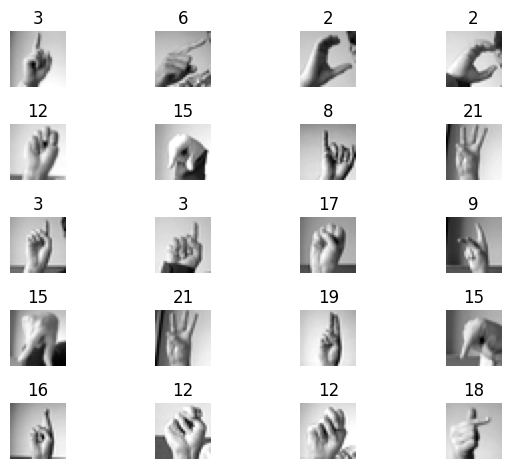

In [28]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(10,10))

for i in range(20):
  plt.subplot(5,4,i+1)
  row=x_train[i]
  label=y_train[i]
  image=row.reshape(28,28)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.tight_layout()

In [29]:
x_train.min()

0

In [30]:
x_train.max()

255

In [31]:
x_train=x_train/255
x_valid=x_valid/255

In [32]:
x_train.min()

0.0

In [33]:
x_train.max()

1.0

In [34]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,24)
y_valid=to_categorical(y_valid,24)

In [35]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
from tensorflow.keras.models import Sequential
model=Sequential()

In [38]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=512,activation='relu',input_shape=(784,)))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=24,activation='softmax'))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676888 (2.58 MB)
Trainable params: 676888 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history=model.fit(x_train,y_train,epochs=5,verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/5
858/858 [==============================] - 5s 4ms/step - loss: 1.9461 - accuracy: 0.3853 - val_loss: 1.5459 - val_accuracy: 0.4815
Epoch 2/5
858/858 [==============================] - 3s 4ms/step - loss: 0.9590 - accuracy: 0.6749 - val_loss: 1.0250 - val_accuracy: 0.6629
Epoch 3/5
858/858 [==============================] - 3s 4ms/step - loss: 0.5778 - accuracy: 0.8068 - val_loss: 0.8904 - val_accuracy: 0.7172
Epoch 4/5
858/858 [==============================] - 4s 5ms/step - loss: 0.3754 - accuracy: 0.8733 - val_loss: 1.3219 - val_accuracy: 0.6914
Epoch 5/5
858/858 [==============================] - 3s 4ms/step - loss: 0.2743 - accuracy: 0.9146 - val_loss: 1.1671 - val_accuracy: 0.7241


In [42]:
history.history

{'loss': [1.9461158514022827,
  0.9589641690254211,
  0.5778025984764099,
  0.37536337971687317,
  0.2743324935436249],
 'accuracy': [0.3853214383125305,
  0.6749225854873657,
  0.8067747354507446,
  0.8733199834823608,
  0.9145510792732239],
 'val_loss': [1.545945167541504,
  1.024965763092041,
  0.890394926071167,
  1.3219389915466309,
  1.167122721672058],
 'val_accuracy': [0.48145565390586853,
  0.6628555655479431,
  0.7172336578369141,
  0.6914389133453369,
  0.7240658402442932]}